In [5]:
import pandas as pd

vehicles = pd.read_csv('../vehicles_us.csv')

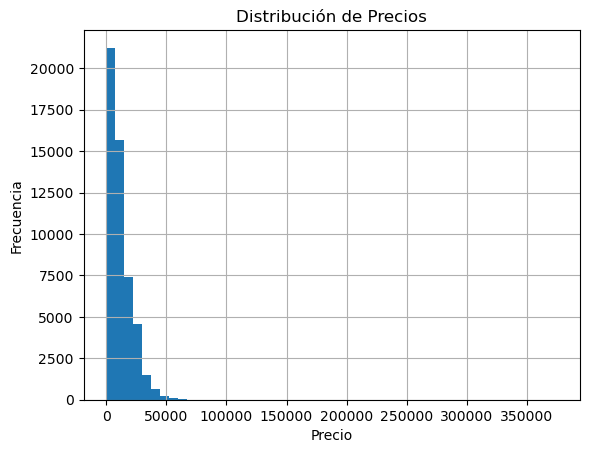

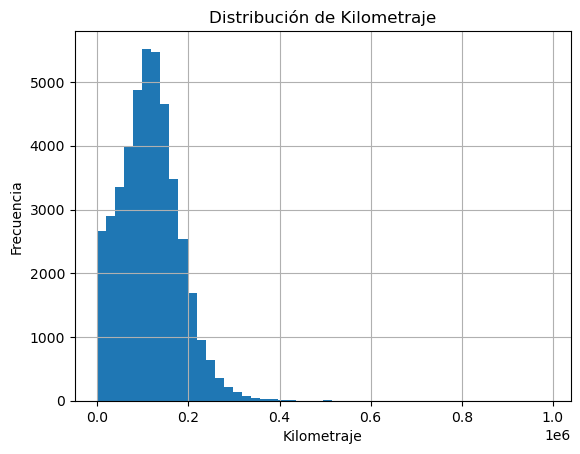

In [6]:
import matplotlib.pyplot as plt

# Histograma de precios
vehicles['price'].hist(bins=50)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de kilometraje
vehicles['odometer'].hist(bins=50)
plt.title('Distribución de Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.show()

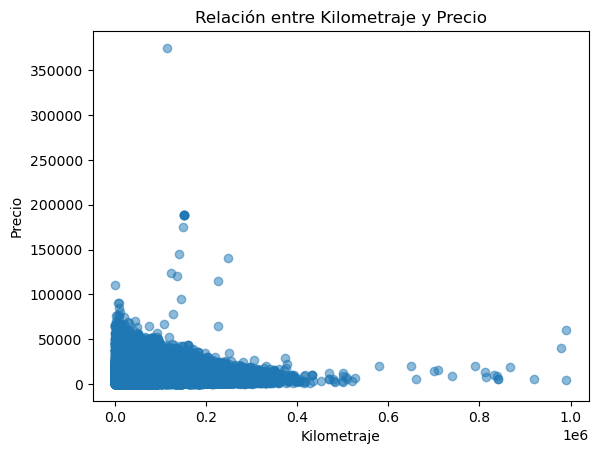

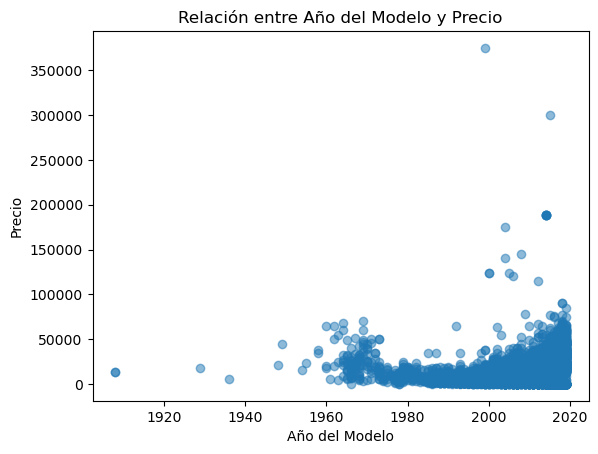

In [9]:
# Gráfico de dispersión entre precio y kilometraje
plt.scatter(vehicles['odometer'], vehicles['price'], alpha=0.5)
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

# Gráfico de dispersión entre año del modelo y precio
plt.scatter(vehicles['model_year'], vehicles['price'], alpha=0.5)
plt.title('Relación entre Año del Modelo y Precio')
plt.xlabel('Año del Modelo')
plt.ylabel('Precio')
plt.show()

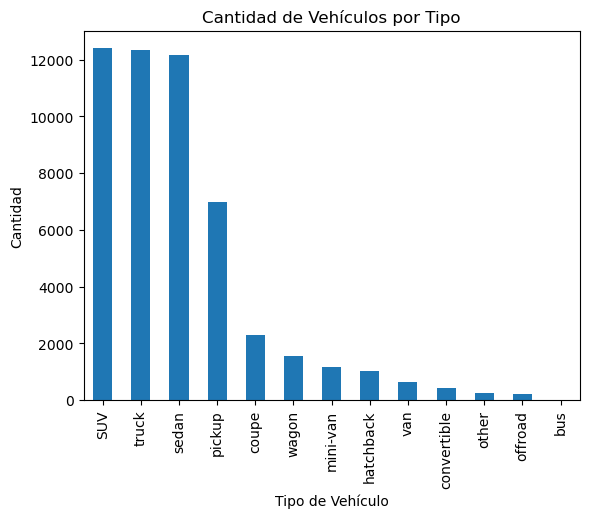

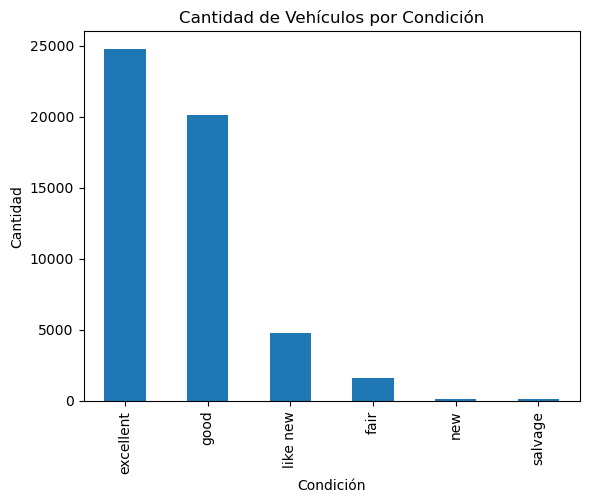

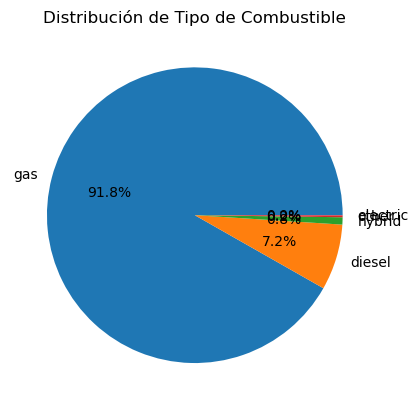

In [8]:
# Gráfico de barras: cantidad de vehículos por tipo
vehicles['type'].value_counts().plot(kind='bar')
plt.title('Cantidad de Vehículos por Tipo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras: cantidad de vehículos por condición
vehicles['condition'].value_counts().plot(kind='bar')
plt.title('Cantidad de Vehículos por Condición')
plt.xlabel('Condición')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de pastel: distribución de combustible
vehicles['fuel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Tipo de Combustible')
plt.ylabel('')
plt.show()

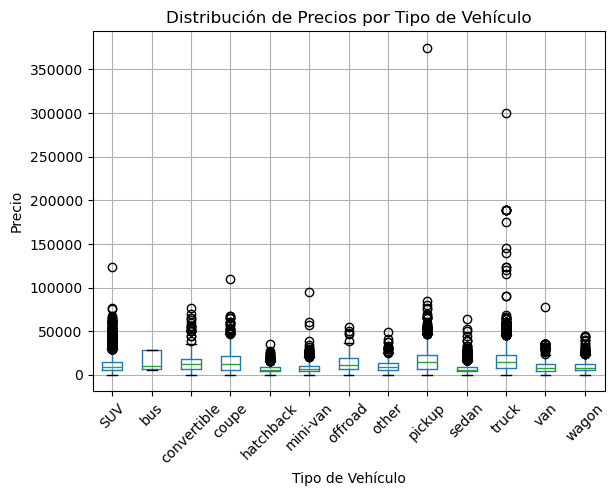

In [ ]:
# Gráfico de caja para visualizar la distribución de precios por tipo de vehículo
vehicles.boxplot(column='price', by='type', rot=45)
plt.title('Distribución de Precios por Tipo de Vehículo')
plt.suptitle('')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Precio')
plt.show() 

In [15]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np # Necesario para generar datos de ejemplo más realistas

# --- Generación de datos de ejemplo más realistas ---
# Para que el código sea reproducible y el histograma tenga una distribución interesante.
# En un caso real, reemplazarías esto con la carga de tu DataFrame 'vehicles'.
np.random.seed(42) # Para resultados consistentes
num_vehicles = 1000
odometer_readings = np.random.normal(loc=120000, scale=40000, size=num_vehicles)
# Asegurarse de que los valores del odómetro no sean negativos
odometer_readings[odometer_readings < 0] = np.random.uniform(1000, 10000, size=np.sum(odometer_readings < 0))
vehicles = pd.DataFrame({'odometer': odometer_readings})

# --- Creación del Histograma Mejorado ---
fig = go.Figure(data=[go.Histogram(
    x=vehicles['odometer'],
    marker_color='#336699',  # Color de las barras (un tono de azul más agradable)
    opacity=0.8,              # Transparencia de las barras
    # nbinsx=50,                # Opcional: Especificar el número de "bins" (barras)
    xbins=dict(                # Definir los "bins" (intervalos) de forma más específica
        start=0,
        end=vehicles['odometer'].max() + 10000, # Un poco más allá del máximo para asegurar que todos los datos se muestren
        size=10000               # Cada "bin" representa 10,000 unidades de odómetro
    ),
    hovertemplate='Rango: %{x}<br>Cantidad: %{y}<extra></extra>' # Personalizar el texto al pasar el ratón
)])

# --- Personalización del Diseño del Gráfico ---
fig.update_layout(
    title={
        'text': 'Distribución del Kilometraje (Odómetro) de Vehículos',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='darkblue') # Estilo del título
    },
    xaxis_title={
        'text': 'Kilometraje del Vehículo (en millas o kilómetros)',
        'font': dict(size=14, color='darkgreen') # Estilo del título del eje X
    },
    yaxis_title={
        'text': 'Cantidad de Vehículos',
        'font': dict(size=14, color='darkgreen') # Estilo del título del eje Y
    },
    bargap=0.05,  # Reducir el espacio entre las barras para una apariencia más compacta
    # bargroupgap=0.1, # Útil si tuvieras múltiples histogramas superpuestos
    plot_bgcolor='rgba(0,0,0,0)', # Fondo transparente del área del gráfico
    paper_bgcolor='rgba(0,0,0,0)', # Fondo transparente de toda la figura
    annotations=[
        go.layout.Annotation(
            x=0.5,
            y=-0.15,
            xref='paper',
            yref='paper',
            text='Fuente: Datos simulados para demostración', # Añadir una fuente o nota al pie
            showarrow=False,
            font=dict(size=10, color='gray')
        )
    ],
    # Estilo de los ejes
    xaxis=dict(
        showgrid=True, gridwidth=1, gridcolor='LightGray',
        zeroline=True, zerolinewidth=2, zerolinecolor='LightGray',
        tickfont=dict(size=10),
        tickangle=-45 # Ángulo de las etiquetas del eje X para evitar superposiciones
    ),
    yaxis=dict(
        showgrid=True, gridwidth=1, gridcolor='LightGray',
        zeroline=True, zerolinewidth=2, zerolinecolor='LightGray',
        tickfont=dict(size=10)
    ),
    margin=dict(l=80, r=80, t=100, b=120), # Márgenes para acomodar etiquetas y título
)

# Mostrar el gráfico Plotly
fig.show()